Datasets Used

In [ ]:
# I used about 9 different datasets but these are the links to those websites
# New Residential Const.
https://www.census.gov/construction/nrc/index.html
# Rental Vacany
https://www.census.gov/housing/hvs/index.html
# Homeownership rates
https://www.census.gov/housing/hvs/index.html
# Socioecomic data
https://www.census.gov/programs-surveys/acs/data.html

How I used the rental vacany rate dataset to create a line graph

In [2]:
import pandas as pd
from google.colab import files

# File upload
uploaded = files.upload()

Saving tab1.xlsx to tab1 (2).xlsx


In [3]:
# Uploaded Excel file name
file_name = 'tab1.xlsx'

# Read the Excel file, specifying:
# - Sheet name: 'Table 1'
# - Skip the first 4 rows (header starts at row 5)
# - Use a multi-level header (columns span two rows)
vacancy_data = pd.read_excel(file_name, sheet_name='Table 1', skiprows=4, header=[0, 1])

# Display the first 5 rows
print(vacancy_data.head())

                Year Rental Vacancy Rates                     \
  Unnamed: 0_level_1   Unnamed: 1_level_1 Unnamed: 2_level_1   
0                NaN        First Quarter    Second Quarter    
1                NaN                  NaN                NaN   
2                NaN                  NaN                NaN   
3   2024...…………..…….                  6.6                6.6   
4   2023...…………..…….                  6.4                6.3   

                                        Homeowner Vacancy Rates  \
  Unnamed: 3_level_1 Unnamed: 4_level_1      Unnamed: 5_level_1   
0      Third Quarter     Fourth Quarter           First Quarter   
1                NaN                NaN                     NaN   
2                NaN                NaN                     NaN   
3                6.9                6.9                     0.8   
4                6.6                6.6                     0.8   

                                                            
  Unnamed: 6_level_1

In [4]:
# Flatten multi-level columns into a single string (e.g., "Rental Q1")
vacancy_data.columns = [f"{col[0]} {col[1]}" for col in vacancy_data.columns]
print(vacancy_data.columns)  # Verify new column names

# Rename columns
vacancy_data.columns = [
    'Year',
    'Rental Q1', 'Rental Q2', 'Rental Q3', 'Rental Q4',
    'Homeowner Q1', 'Homeowner Q2', 'Homeowner Q3', 'Homeowner Q4'
]

print(vacancy_data.head())  # Check renamed columns

Index(['Year Unnamed: 0_level_1', 'Rental Vacancy Rates Unnamed: 1_level_1',
       'Rental Vacancy Rates Unnamed: 2_level_1',
       'Rental Vacancy Rates Unnamed: 3_level_1',
       'Rental Vacancy Rates Unnamed: 4_level_1',
       'Homeowner Vacancy Rates Unnamed: 5_level_1',
       'Homeowner Vacancy Rates Unnamed: 6_level_1',
       'Homeowner Vacancy Rates Unnamed: 7_level_1',
       'Homeowner Vacancy Rates Unnamed: 8_level_1'],
      dtype='object')
               Year      Rental Q1        Rental Q2      Rental Q3  \
0               NaN  First Quarter  Second Quarter   Third Quarter   
1               NaN            NaN              NaN            NaN   
2               NaN            NaN              NaN            NaN   
3  2024...…………..…….            6.6              6.6            6.9   
4  2023...…………..…….            6.4              6.3            6.6   

        Rental Q4   Homeowner Q1     Homeowner Q2   Homeowner Q3  \
0  Fourth Quarter  First Quarter  Second Quarter 

In [5]:
# Drop rows where 'Year' is NaN (missing)
vacancy_data.dropna(subset=['Year'], inplace=True)

# Reset the index after dropping rows
vacancy_data.reset_index(drop=True, inplace=True)

print(vacancy_data.head())  # Verify cleaned data

               Year Rental Q1 Rental Q2 Rental Q3 Rental Q4 Homeowner Q1  \
0  2024...…………..…….       6.6       6.6       6.9       6.9          0.8   
1  2023...…………..…….       6.4       6.3       6.6       6.6          0.8   
2  2022...…………..…….       5.8       5.6         6       5.8          0.8   
3  2021...…………..…….       6.8       6.2       5.8       5.6          0.9   
4  2020...…………..…….       6.6       5.7       6.4       6.5          1.1   

  Homeowner Q2 Homeowner Q3 Homeowner Q4  
0          0.9            1          1.1  
1          0.7          0.8          0.9  
2          0.8          0.9          0.8  
3          0.9          0.9          0.9  
4          0.9          0.9            1  


In [6]:
# Reshaped the data using `pd.melt`:
# - Keep 'Year' as the identifier
# - Melt all other columns into 'Quarter' and 'Rate'
vacancy_data_2 = pd.melt(
    vacancy_data,
    id_vars=['Year'],
    value_vars=[
        'Rental Q1', 'Rental Q2', 'Rental Q3', 'Rental Q4',
        'Homeowner Q1', 'Homeowner Q2', 'Homeowner Q3', 'Homeowner Q4'
    ],
    var_name='Quarter',  # New column for quarter labels
    value_name='Rate'    # New column for vacancy rates
)

# Split 'Quarter' into 'Type' (Rental/Homeowner) and 'Quarter' (Q1-Q4)
vacancy_data_2[['Type', 'Quarter']] = vacancy_data_2['Quarter'].str.split(' ', expand=True)

print(vacancy_data_2.head())  # Check reshaped data

               Year Quarter Rate    Type
0  2024...…………..…….      Q1  6.6  Rental
1  2023...…………..…….      Q1  6.4  Rental
2  2022...…………..…….      Q1  5.8  Rental
3  2021...…………..…….      Q1  6.8  Rental
4  2020...…………..…….      Q1  6.6  Rental


In [8]:
# Yearly average rates for Rental vs. Homeowner
yearly_trends = vacancy_data_2.groupby(['Year', 'Type'])['Rate'].mean().unstack()
print("\nYearly Average Vacancy Rates:")
print(yearly_trends.head())  # First 5 years


Yearly Average Vacancy Rates:
Type                  Homeowner Rental
Year                                  
1965..…………...........     1.575   8.25
1966..…………...........     1.425    7.7
1967..…………...........      1.35   6.85
1968..…………...........      1.15    5.9
1969.....…………........     1.025  5.475


Made a dataframe for both rental vacany rates and new construction permits

In [10]:
import pandas as pd

# Rental vacancy rates by state and quarter
rental_vacancy_data = {
    "State": ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"],
    "Q1 2024": [8.6, 5.0, 8.1, 9.8, 4.1, 4.7, 2.6, 2.1, 5.6, 10.1, 7.8, 7.2, 5.5, 5.5, 11.9, 8.8, 4.9, 7.9, 9.3, 2.1, 6.3, 3.5, 7.7, 6.7, 8.1, 7.2, 4.9, 6.2, 9.9, 3.6, 3.9, 9.1, 5.1, 7.2, 9.2, 6.1, 8.2, 4.7, 4.6, 4.0, 13.1, 7.1, 7.0, 8.4, 5.8, 4.7, 5.4, 5.1, 8.0, 5.6, 4.9],
    "Q2 2024": [11.5, 4.7, 6.8, 10.8, 5.2, 3.4, 3.5, 1.9, 7.1, 10.5, 8.2, 9.6, 5.2, 5.9, 7.9, 7.6, 4.9, 6.5, 8.6, 2.8, 6.1, 4.0, 5.8, 3.2, 5.8, 7.0, 4.3, 3.6, 7.0, 5.9, 4.1, 6.4, 6.3, 5.2, 8.4, 4.4, 6.2, 5.5, 7.6, 1.4, 9.8, 7.3, 8.5, 9.1, 5.3, 4.8, 6.6, 6.3, 9.9, 2.9, 7.4],
    "Q3 2024": [10.2, 4.2, 8.9, 10.9, 5.3, 5.3, 3.2, 4.6, 7.0, 9.9, 8.2, 6.9, 4.7, 7.3, 10.0, 7.3, 5.6, 5.6, 8.3, 4.6, 4.9, 2.9, 7.1, 7.3, 8.8, 10.0, 4.2, 5.5, 7.3, 4.4, 3.9, 3.8, 5.7, 6.4, 6.3, 5.3, 8.1, 6.1, 8.4, 3.4, 8.2, 8.4, 8.1, 10.0, 3.7, 2.4, 4.5, 5.7, 11.1, 2.7, 4.9],
    "Q4 2024": [10.2, 5.8, 11.1, 7.8, 4.5, 4.7, 2.2, 6.3, 7.4, 9.4, 8.9, 5.7, 4.9, 7.1, 9.9, 8.4, 6.2, 7.5, 11.5, 1.8, 5.7, 2.7, 6.5, 4.5, 7.9, 10.3, 3.3, 6.2, 8.3, 2.4, 2.5, 7.1, 4.9, 6.9, 7.0, 7.2, 9.3, 10.6, 6.7, 1.3, 10.8, 7.8, 9.0, 9.3, 4.7, 2.6, 5.8, 6.9, 10.0, 5.2, 4.6],
}

# Convert to DataFrame
rental_vacancy_df = pd.DataFrame(rental_vacancy_data)

# Map states to regions
state_to_region = {
    "Alabama": "South", "Alaska": "West", "Arizona": "West", "Arkansas": "South", "California": "West",
    "Colorado": "West", "Connecticut": "Northeast", "Delaware": "South", "District of Columbia": "South",
    "Florida": "South", "Georgia": "South", "Hawaii": "West", "Idaho": "West", "Illinois": "Midwest",
    "Indiana": "Midwest", "Iowa": "Midwest", "Kansas": "Midwest", "Kentucky": "South", "Louisiana": "South",
    "Maine": "Northeast", "Maryland": "South", "Massachusetts": "Northeast", "Michigan": "Midwest",
    "Minnesota": "Midwest", "Mississippi": "South", "Missouri": "Midwest", "Montana": "West", "Nebraska": "Midwest",
    "Nevada": "West", "New Hampshire": "Northeast", "New Jersey": "Northeast", "New Mexico": "West",
    "New York": "Northeast", "North Carolina": "South", "North Dakota": "Midwest", "Ohio": "Midwest",
    "Oklahoma": "South", "Oregon": "West", "Pennsylvania": "Northeast", "Rhode Island": "Northeast",
    "South Carolina": "South", "South Dakota": "Midwest", "Tennessee": "South", "Texas": "South", "Utah": "West",
    "Vermont": "Northeast", "Virginia": "South", "Washington": "West", "West Virginia": "South", "Wisconsin": "Midwest",
    "Wyoming": "West",
}

# Add region column to rental vacancy data
rental_vacancy_df["Region"] = rental_vacancy_df["State"].map(state_to_region)

# Average rental vacancy rates by region and quarter
average_vacancy_rates = rental_vacancy_df.groupby("Region")[["Q1 2024", "Q2 2024", "Q3 2024", "Q4 2024"]].mean().reset_index()

# Monthly permits by region
monthly_permits = {
    "Region": ["Northeast", "Midwest", "South", "West"],
    "January": [147, 213, 800, 348],
    "February": [214, 237, 794, 318],
    "March": [146, 204, 794, 341],
    "April": [152, 166, 828, 294],
    "May": [120, 180, 779, 320],
    "June": [117, 207, 810, 320],
    "July": [141, 184, 773, 308],
    "August": [145, 206, 815, 304],
    "September": [127, 201, 766, 331],
    "October": [142, 196, 755, 326],
    "November": [140, 218, 800, 335],
    "December": [147, 215, 808, 313],
}

# Convert to DataFrame
monthly_permits_df = pd.DataFrame(monthly_permits)

# Monthly permits into quarters
quarterly_permits = {
    "Region": ["Northeast", "Midwest", "South", "West"],
    "Q1 2024": [
        monthly_permits_df.loc[monthly_permits_df["Region"] == "Northeast", ["January", "February", "March"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "Midwest", ["January", "February", "March"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "South", ["January", "February", "March"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "West", ["January", "February", "March"]].sum().sum(),
    ],
    "Q2 2024": [
        monthly_permits_df.loc[monthly_permits_df["Region"] == "Northeast", ["April", "May", "June"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "Midwest", ["April", "May", "June"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "South", ["April", "May", "June"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "West", ["April", "May", "June"]].sum().sum(),
    ],
    "Q3 2024": [
        monthly_permits_df.loc[monthly_permits_df["Region"] == "Northeast", ["July", "August", "September"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "Midwest", ["July", "August", "September"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "South", ["July", "August", "September"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "West", ["July", "August", "September"]].sum().sum(),
    ],
    "Q4 2024": [
        monthly_permits_df.loc[monthly_permits_df["Region"] == "Northeast", ["October", "November", "December"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "Midwest", ["October", "November", "December"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "South", ["October", "November", "December"]].sum().sum(),
        monthly_permits_df.loc[monthly_permits_df["Region"] == "West", ["October", "November", "December"]].sum().sum(),
    ],
}

# Convert to DataFrame
quarterly_permits_df = pd.DataFrame(quarterly_permits)

# Combined average vacancy rates and quarterly permits
combined_df = pd.merge(average_vacancy_rates, quarterly_permits_df, on="Region")

# Display the combined dataset
print(combined_df)

      Region  Q1 2024_x  Q2 2024_x  Q3 2024_x  Q4 2024_x  Q1 2024_y  \
0    Midwest   7.241667   5.741667   6.900000   7.191667        654   
1  Northeast   3.788889   4.488889   4.322222   3.011111        507   
2      South   7.817647   7.782353   7.929412   8.452941       2388   
3       West   6.076923   5.930769   5.461538   6.323077       1007   

   Q2 2024_y  Q3 2024_y  Q4 2024_y  
0        553        591        629  
1        389        413        429  
2       2417       2354       2363  
3        934        943        974  


Combined both quartely vacany rates and quartely permits

In [12]:
# Merge average vacancy rates and quarterly permits
combined_df = pd.merge(average_vacancy_rates, quarterly_permits_df, on="Region")

# Rename columns to match the format in the plotting
combined_df = combined_df.rename(columns={
    "Q1 2024_x": "Q1 2024 (Vacancy)",
    "Q2 2024_x": "Q2 2024 (Vacancy)",
    "Q3 2024_x": "Q3 2024 (Vacancy)",
    "Q4 2024_x": "Q4 2024 (Vacancy)",
    "Q1 2024_y": "Q1 2024 (Permits)",
    "Q2 2024_y": "Q2 2024 (Permits)",
    "Q3 2024_y": "Q3 2024 (Permits)",
    "Q4 2024_y": "Q4 2024 (Permits)",
})

# Display the combined dataset
print(combined_df)

      Region  Q1 2024 (Vacancy)  Q2 2024 (Vacancy)  Q3 2024 (Vacancy)  \
0    Midwest           7.241667           5.741667           6.900000   
1  Northeast           3.788889           4.488889           4.322222   
2      South           7.817647           7.782353           7.929412   
3       West           6.076923           5.930769           5.461538   

   Q4 2024 (Vacancy)  Q1 2024 (Permits)  Q2 2024 (Permits)  Q3 2024 (Permits)  \
0           7.191667                654                553                591   
1           3.011111                507                389                413   
2           8.452941               2388               2417               2354   
3           6.323077               1007                934                943   

   Q4 2024 (Permits)  
0                629  
1                429  
2               2363  
3                974  


Visualizations

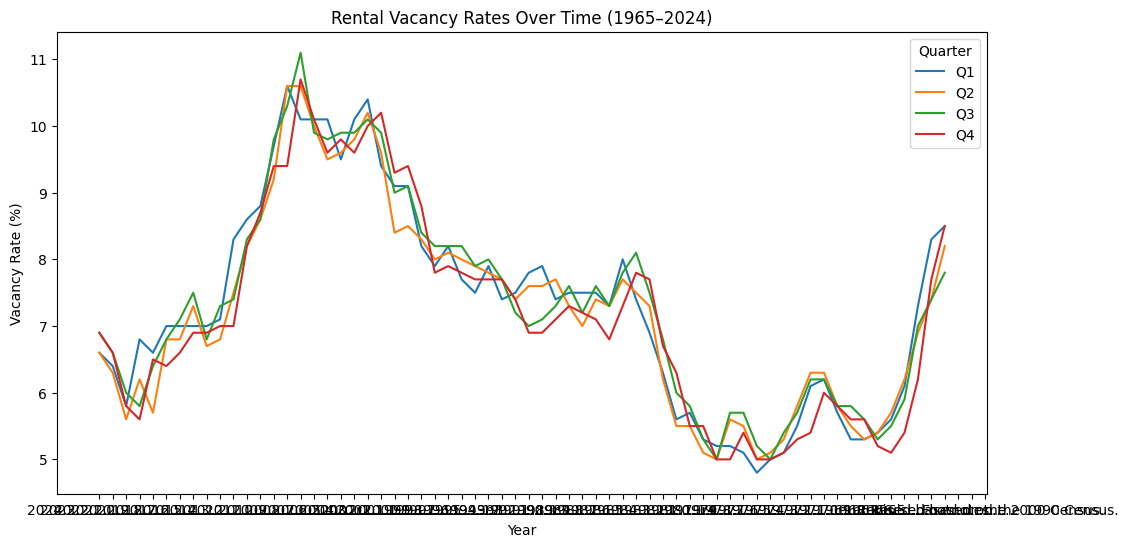

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Rental data only
rental_data = vacancy_data_2[vacancy_data_2['Type'] == 'Rental']

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rental_data,
    x='Year',          # X-axis: Year
    y='Rate',          # Y-axis: Vacancy Rate
    hue='Quarter',     # Color lines by quarter
    palette='tab10'    # Used a color palette
)

# Customize plot labels
plt.title('Rental Vacancy Rates Over Time (1965–2024)')
plt.xlabel('Year')
plt.ylabel('Vacancy Rate (%)')
plt.legend(title='Quarter')  # Add a legend for quarters

plt.show()  # Display the plot

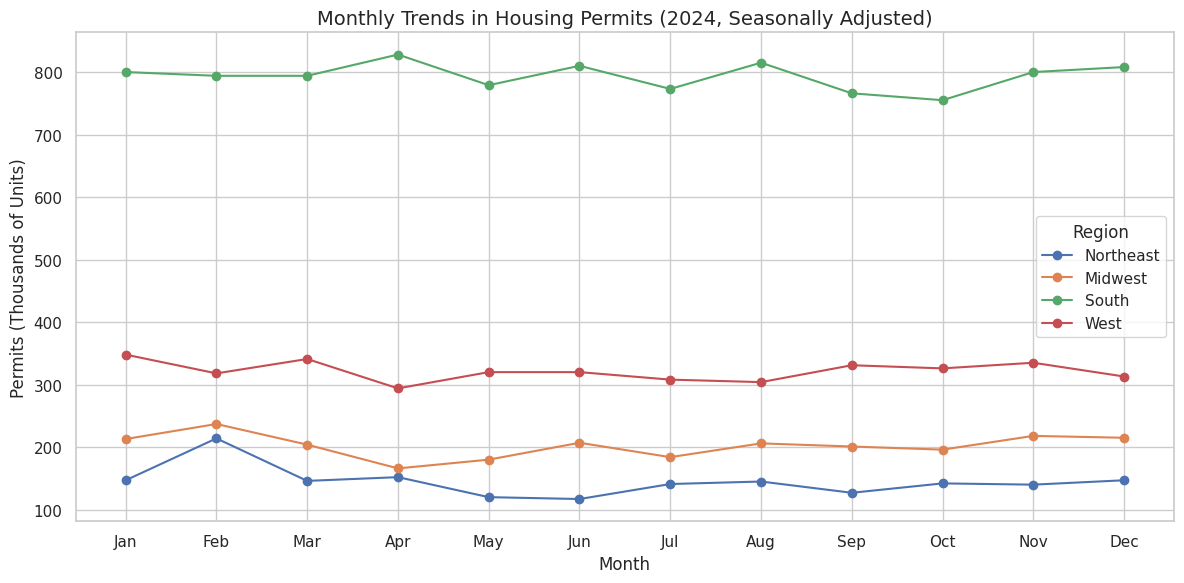

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data (Had to input data manually. Had trouble uploading data)
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Northeast": [147, 214, 146, 152, 120, 117, 141, 145, 127, 142, 140, 147],
    "Midwest": [213, 237, 204, 166, 180, 207, 184, 206, 201, 196, 218, 215],
    "South": [800, 794, 794, 828, 779, 810, 773, 815, 766, 755, 800, 808],
    "West": [348, 318, 341, 294, 320, 320, 308, 304, 331, 326, 335, 313]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

for region in ["Northeast", "Midwest", "South", "West"]:
    plt.plot(df["Month"], df[region], marker='o', label=region)

plt.title("Monthly Trends in Housing Permits (2024, Seasonally Adjusted)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Permits (Thousands of Units)", fontsize=12)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

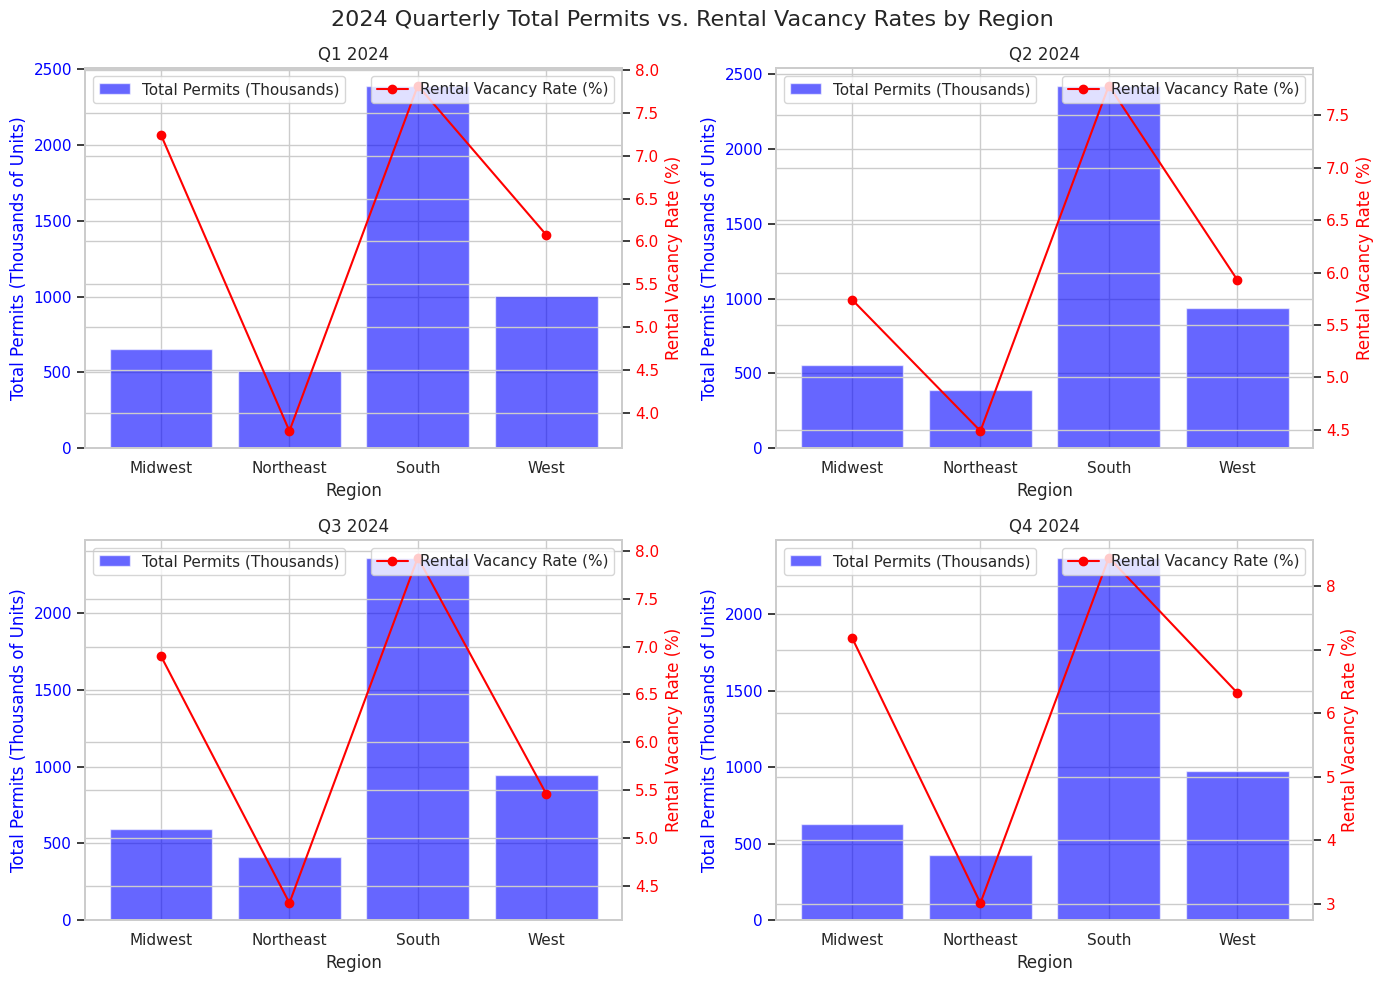

In [13]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("2024 Quarterly Total Permits vs. Rental Vacancy Rates by Region", fontsize=16)

# Quarters to plot
quarters = ["Q1 2024", "Q2 2024", "Q3 2024", "Q4 2024"]

# Loop through each quarter and create a subplot
for i, quarter in enumerate(quarters):
    ax = axes[i // 2, i % 2]

    # Bar chart for total permits
    ax.bar(combined_df["Region"], combined_df[f"{quarter} (Permits)"], color="blue", alpha=0.6, label="Total Permits (Thousands)")
    ax.set_xlabel("Region")
    ax.set_ylabel("Total Permits (Thousands of Units)", color="blue")
    ax.tick_params(axis="y", labelcolor="blue")

    # Line chart for vacancy rates
    ax2 = ax.twinx()
    ax2.plot(combined_df["Region"], combined_df[f"{quarter} (Vacancy)"], color="red", marker="o", label="Rental Vacancy Rate (%)")
    ax2.set_ylabel("Rental Vacancy Rate (%)", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # title and legends
    ax.set_title(quarter)
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# Adjust layout and display
plt.tight_layout()
plt.show()

<ipython-input-14-5364641b863c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions, y=home_price_to_income_ratio, palette="cividis")


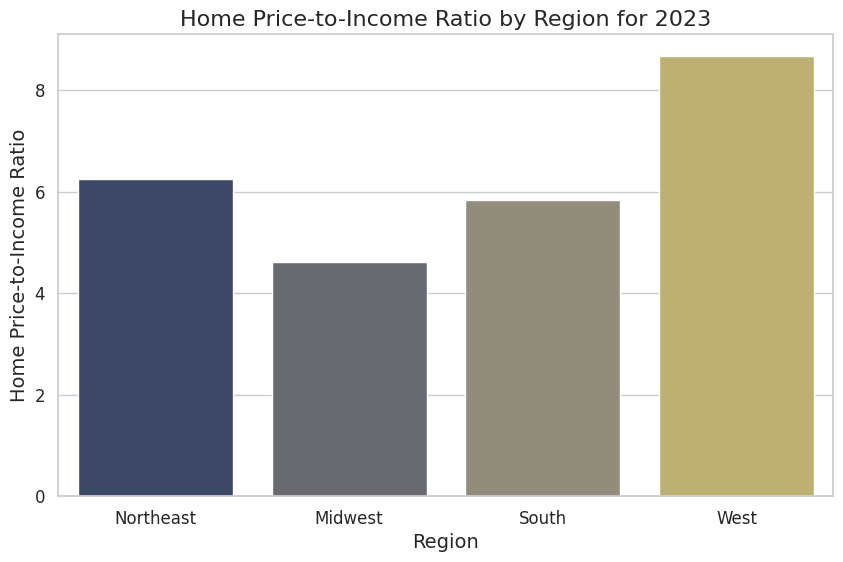

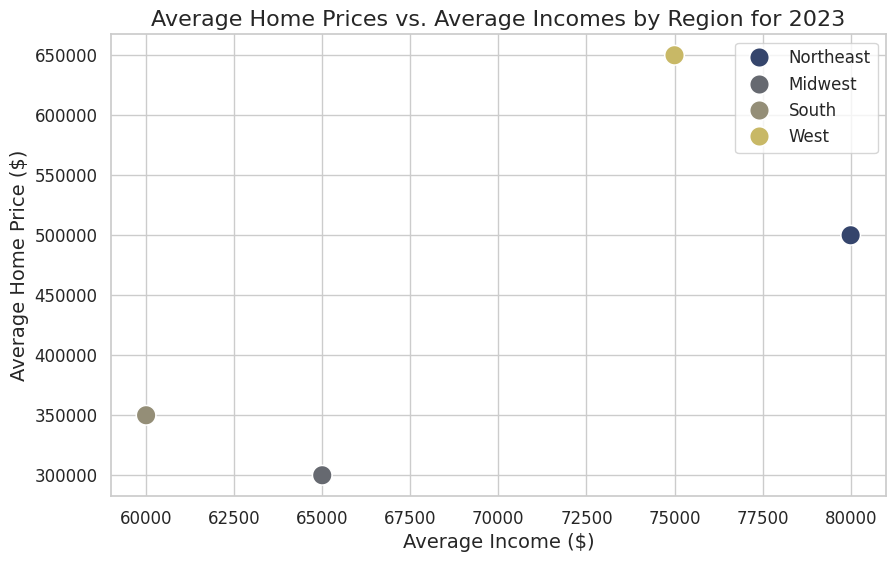

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
regions = ["Northeast", "Midwest", "South", "West"]
average_home_prices = [500000, 300000, 350000, 650000]  # Average home prices
average_incomes = [80000, 65000, 60000, 75000]  # Average incomes
home_price_to_income_ratio = [6.25, 4.62, 5.83, 8.67]  # Pre-calculated ratios

# Bar chart for Home Price-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=regions, y=home_price_to_income_ratio, palette="cividis")
plt.title("Home Price-to-Income Ratio by Region for 2023", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Home Price-to-Income Ratio", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Scatter plot for Home Prices vs. Incomes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_incomes, y=average_home_prices, hue=regions, s=200, palette="cividis")
plt.title("Average Home Prices vs. Average Incomes by Region for 2023", fontsize=16)
plt.xlabel("Average Income ($)", fontsize=14)
plt.ylabel("Average Home Price ($)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()